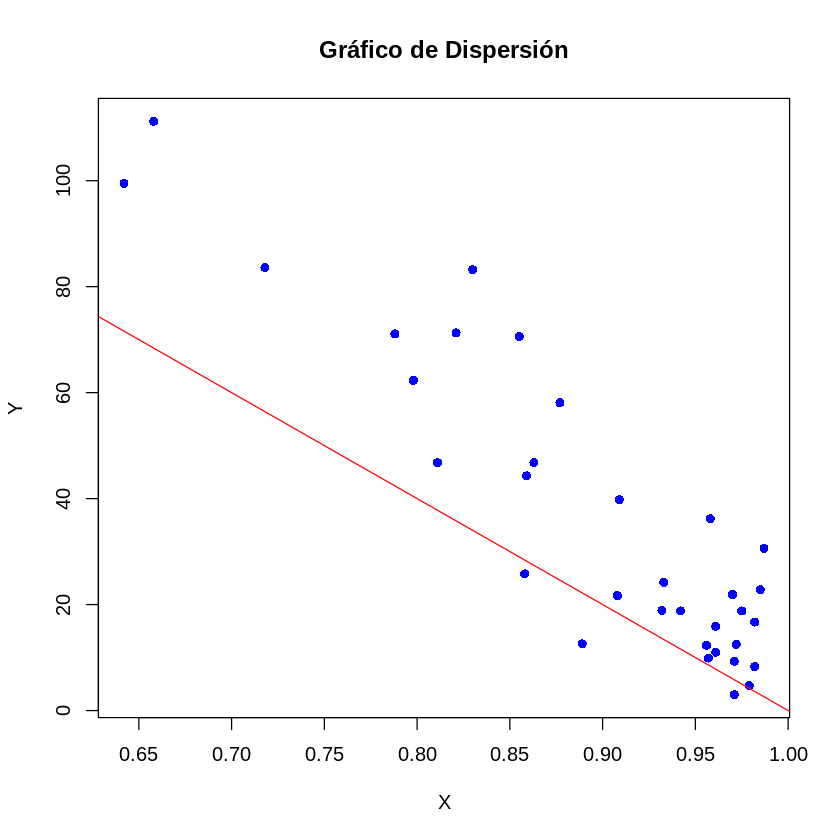

In [1]:
# Datos proporcionados
datos_x <- c(3.0, 4.7, 8.3, 9.3, 9.9, 11.0, 12.3, 12.5, 12.6, 15.9, 16.7, 18.8,
             18.8,18.9,21.7,21.9,22.8,24.2,25.8,30.6,36.2,39.8,44.3,
             46.8,46.8,58.1,62.3,70.6,71.1,71.3,83.2,83.6,99.5,111.2)
datos_y <- c(0.971, 0.979, 0.982, 0.971, 0.957, 0.961, 0.956, 0.972, 0.889, 0.961, 0.982, 0.975,
             0.942,0.932,0.908,0.970,0.985,0.933,0.858,0.987,0.958,0.909,0.859,
             0.863,0.811,0.877,0.798,0.855,0.788,0.821,0.830,0.718,0.642,0.658)


xmin <- min(datos_x)
xmax <- max(datos_x)
ymin <- min(datos_y)
ymax <- max(datos_y)

# Graficar los datos
plot(datos_y, datos_x, main = "Gráfico de Dispersión", xlab = "X", ylab = "Y", col = "blue", pch = 16)

# Agregar una línea recta visualmente
abline(a = 200, b = -200, col = "red")  # Ajusta los valores de intersección (a) y pendiente (b) según sea necesario





In [2]:
suma_x <- sum(datos_x)
suma_y <- sum(datos_y)
suma_x2 <- sum(datos_x^2)
suma_y2 <- sum(datos_y^2)
suma_xy <- sum(datos_x * datos_y)

# Mostrar los resultados
cat("Suma de x:", suma_x, "\n")
cat("Suma de y:", suma_y, "\n")
cat("Suma de x^2:", suma_x2, "\n")
cat("Suma de y^2:", suma_y2, "\n")
cat("Suma de xy:", suma_xy, "\n")

Suma de x: 1244.5 
Suma de y: 30.458 
Suma de x^2: 73920.05 
Suma de y^2: 27.57364 
Suma de xy: 1032.486 


In [3]:
RLM<-lm(datos_y~datos_x)
summary(RLM)


Call:
lm(formula = datos_y ~ datos_x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076516 -0.020012 -0.004806  0.027094  0.073747 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.0021006  0.0108877   92.04  < 2e-16 ***
datos_x     -0.0029035  0.0002335  -12.44 8.54e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03933 on 32 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8232 
F-statistic: 154.6 on 1 and 32 DF,  p-value: 8.538e-14


In [4]:
resultado_anova <- aov(datos_y ~ datos_x)
summary(resultado_anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
datos_x      1 0.23915 0.23915   154.6 8.54e-14 ***
Residuals   32 0.04949 0.00155                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [5]:
summary_modelo <- summary(RLM)

# Imprimir los errores estándar de los coeficientes
print(summary_modelo$coefficients[, "Std. Error"])

 (Intercept)      datos_x 
0.0108876522 0.0002335031 


In [6]:
residuos <- residuals(RLM)

# 3. Calcular la media de los residuos
media_residuos <- mean(residuos)

# 4. Realizar una prueba de hipótesis para determinar si la media de los residuos es significativamente diferente de cero
# Puedes usar, por ejemplo, un test t de una muestra
test_t <- t.test(residuos, mu = 0)

# Mostrar la media de los residuos y el resultado del test t
print(paste("Media de los residuos:", media_residuos))
print(test_t)

[1] "Media de los residuos: 1.31962750635471e-18"

	One Sample t-test

data:  residuos
t = 1.9869e-16, df = 33, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.01351276  0.01351276
sample estimates:
   mean of x 
1.319628e-18 



In [7]:
install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
# Realizar la prueba de hipótesis de Durbin-Watson
resultado_dw <- dwtest(RLM)

# Mostrar el resultado de la prueba
print(resultado_dw)


	Durbin-Watson test

data:  RLM
DW = 1.9783, p-value = 0.4018
alternative hypothesis: true autocorrelation is greater than 0



In [9]:
restultlevel<- bptest(RLM)
print(restultlevel)


	studentized Breusch-Pagan test

data:  RLM
BP = 2.9149, df = 1, p-value = 0.08777



In [10]:
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
residuos3 <- residuals(RLM)

# Realizar la prueba de Anderson-Darling
resultado_ad <- ad.test(residuos3)

# Mostrar el resultado de la prueba
print(resultado_ad)


	Anderson-Darling normality test

data:  residuos3
A = 0.38982, p-value = 0.3641



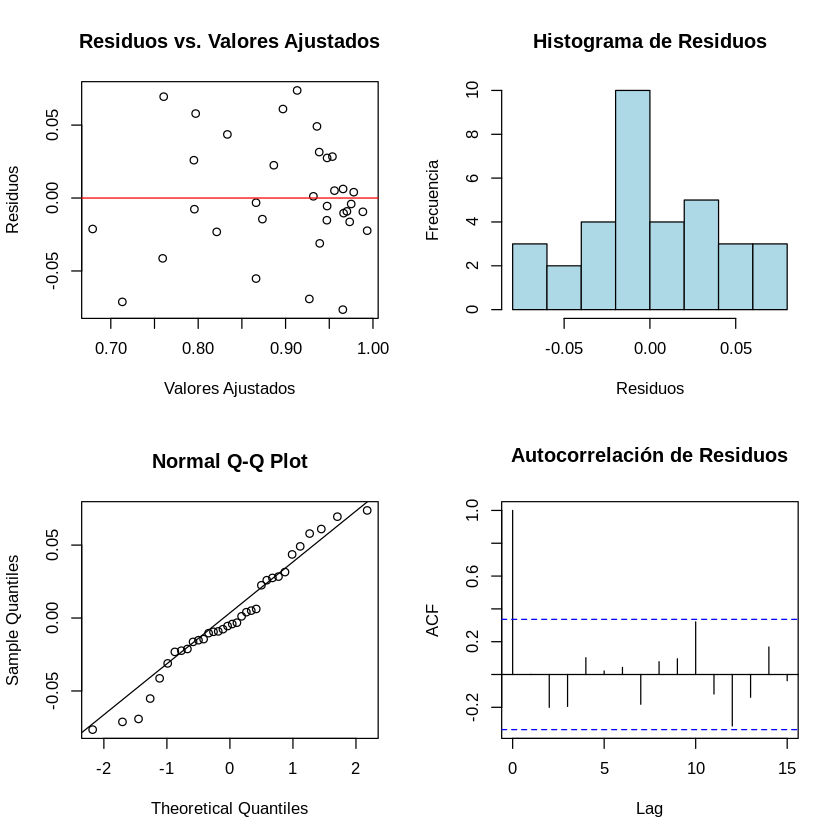

In [12]:
# Obtener los residuos
residuos <- residuals(RLM)

# Gráficos
par(mfrow=c(2,2))  # Para mostrar varios gráficos en una cuadrícula

# Residuos vs. Valores Ajustados
plot(RLM$fitted.values, residuos, main="Residuos vs. Valores Ajustados", xlab="Valores Ajustados", ylab="Residuos")
abline(h=0, col="red")  # Agregar línea en y=0

# Histograma de Residuos
hist(residuos, main="Histograma de Residuos", xlab="Residuos", ylab="Frecuencia", col="lightblue")

# Gráfico Q-Q
qqnorm(residuos)
qqline(residuos)

# Gráfico de Autocorrelación de Residuos
acf(residuos, main="Autocorrelación de Residuos")

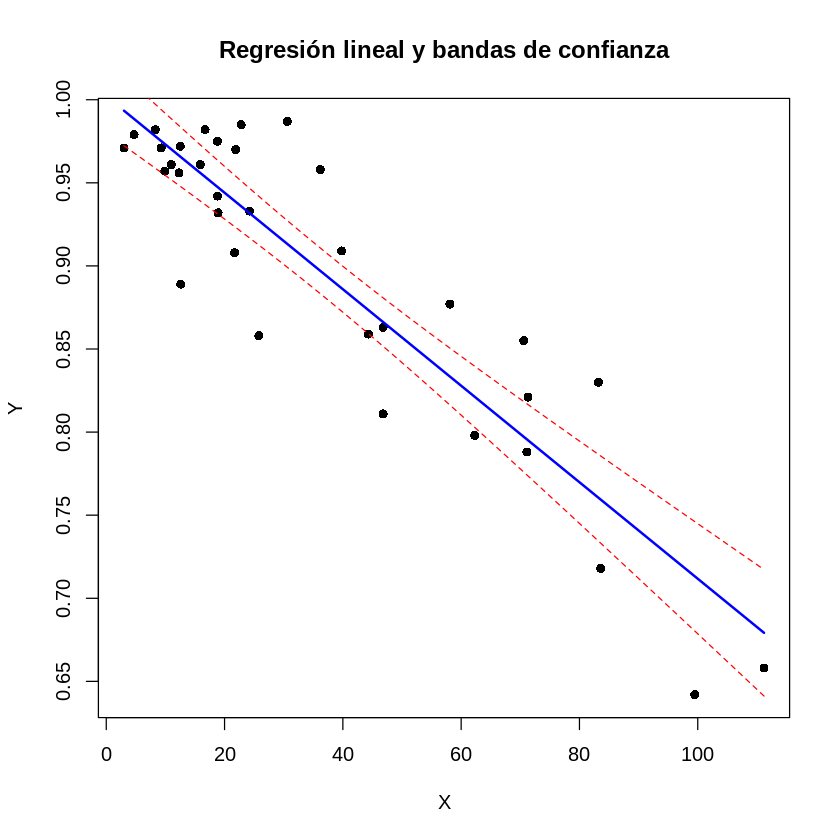

In [14]:
# Crear el dataframe con los datos
datos <- data.frame(x = datos_x, y = datos_y)

# Ajustar un modelo de regresión lineal
modelo <- lm(y ~ x, data = datos)

# Obtener la fórmula del error estándar de ŷ
error_estandar_y_hat <- sqrt(sum(modelo$residuals^2) / (length(modelo$residuals) - 2))

# Calcular los límites de las bandas de confianza del 95% para Y
x_range <- seq(min(datos$x), max(datos$x), length.out = 100)
banda_superior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "upr"]
banda_inferior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "lwr"]

# Graficar la regresión y las bandas de confianza
plot(datos$x, datos$y, xlab = "X", ylab = "Y", main = "Regresión lineal y bandas de confianza", pch = 16)
lines(x_range, predict(modelo, newdata = data.frame(x = x_range)), col = "blue", lwd = 2)  # Línea de regresión
lines(x_range, banda_superior, col = "red", lty = 2)  # Banda superior de confianza
lines(x_range, banda_inferior, col = "red", lty = 2)  # Banda inferior de confianza


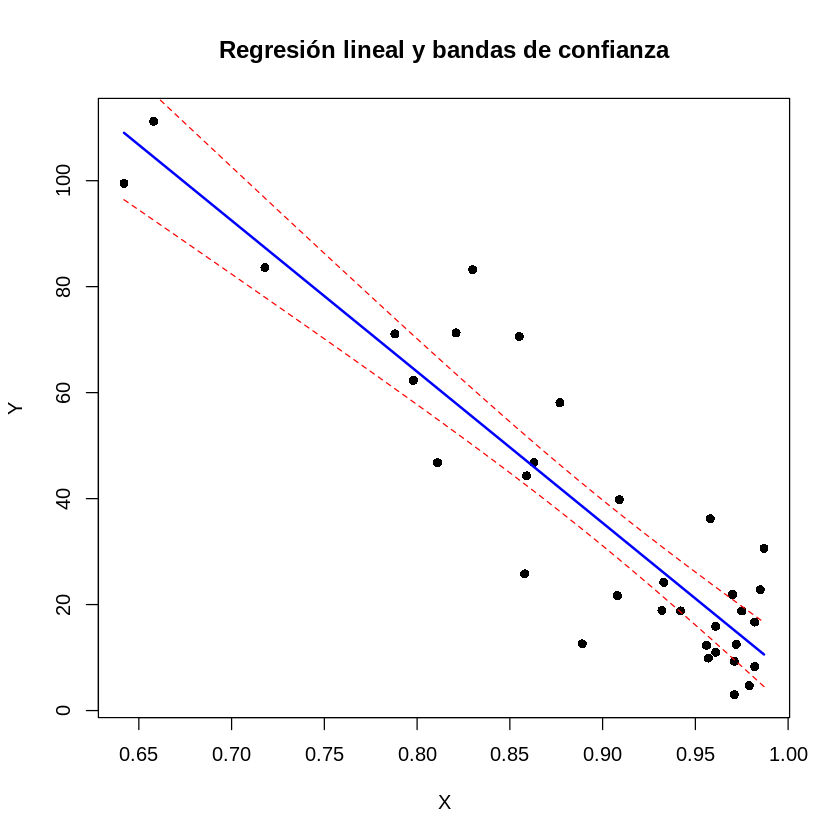

In [15]:
# Crear el dataframe con los datos
datos <- data.frame(x = datos_y, y = datos_x)

# Ajustar un modelo de regresión lineal (Y como variable dependiente)
modelo <- lm(y ~ x, data = datos)

# Obtener la fórmula del error estándar de ŷ
error_estandar_y_hat <- sqrt(sum(modelo$residuals^2) / (length(modelo$residuals) - 2))

# Calcular los límites de las bandas de confianza del 95% para Y
x_range <- seq(min(datos$x), max(datos$x), length.out = 100)
banda_superior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "upr"]
banda_inferior <- predict(modelo, newdata = data.frame(x = x_range), interval = "confidence")[, "lwr"]

# Graficar la regresión y las bandas de confianza
plot(datos$x, datos$y, xlab = "X", ylab = "Y", main = "Regresión lineal y bandas de confianza", pch = 16)
lines(x_range, predict(modelo, newdata = data.frame(x = x_range)), col = "blue", lwd = 2)  # Línea de regresión
lines(x_range, banda_superior, col = "red", lty = 2)  # Banda superior de confianza
lines(x_range, banda_inferior, col = "red", lty = 2)  # Banda inferior de confianza


In [16]:
resumen_modelo <- summary(RLM)

# Obtener el valor F del modelo
valor_F <- resumen_modelo$fstatistic[1]

# Obtener el p-valor asociado al valor F
p_valor <- pf(valor_F, resumen_modelo$fstatistic[2], resumen_modelo$fstatistic[3], lower.tail = FALSE)

# Imprimir el valor F y el p-valor
cat("Valor F:", valor_F, "\n")
cat("P-valor:", p_valor, "\n")

Valor F: 154.6186 
P-valor: 8.537574e-14 


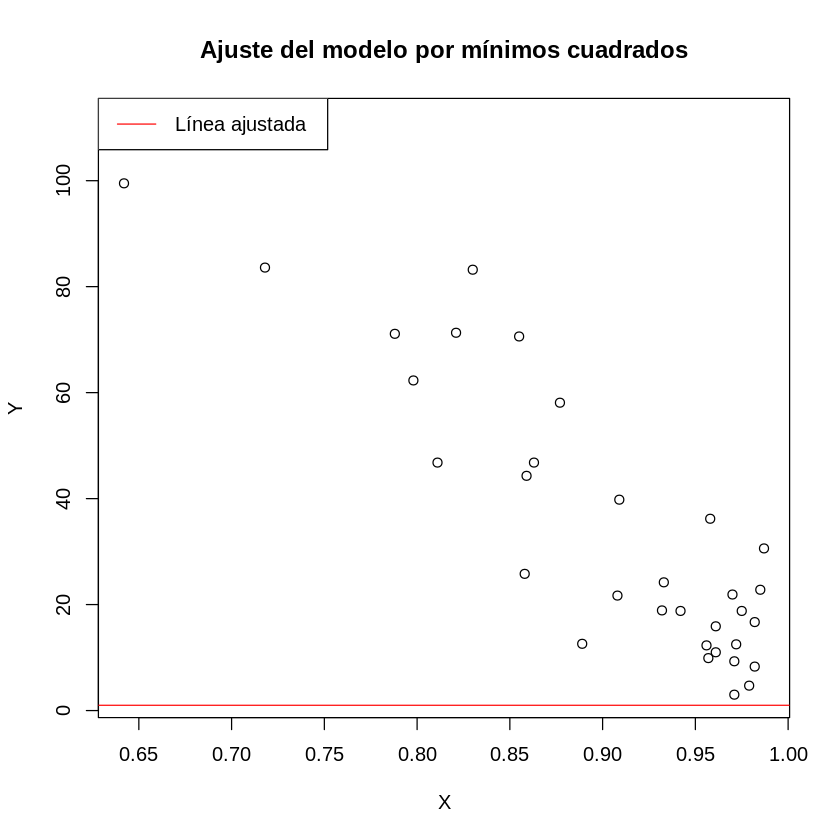

In [17]:


# Dibujar el scatterplot de los datos
plot(datos_y, datos_x, xlab = "X", ylab = "Y", main = "Ajuste del modelo por mínimos cuadrados")

# Dibujar la línea ajustada en el gráfico
abline(RLM, col = "red")

# Añadir leyenda
legend("topleft", legend = "Línea ajustada", col = "red", lty = 1)

